In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
dir_data = '/Users/Sally/Downloads/users.tsv'
dir_data_listens = '/Users/Sally/Downloads/listens.tsv'
dir_data_artists = '/Users/Sally/Downloads/artists.tsv'

In [3]:
# load the users file
df_user = pd.read_table(dir_data, delim_whitespace = True,header = 0)

In [4]:
print df_user.shape 
df_user.head()

(161803, 3)


,profile_id,gender,age
0,705421135523430100,MALE,47.0
1,71059973023428203,FEMALE,25.0
2,-6360016762317810524,NaN,NaN
3,-1426993141676116040,FEMALE,28.0
4,3819441980848568684,FEMALE,NaN


#### Q1        the number of users is : 161803

In [5]:
# load the listens file
lst_colNames = ['profile_id', 'listen_date','artist_id', 'tracks_listened_to']
df_listens = pd.read_table(dir_data_listens, delim_whitespace = True,header = 0, names = lst_colNames)

In [6]:
print df_listens.shape;
df_listens.head()

(1768890, 4)


,profile_id,listen_date,artist_id,tracks_listened_to
0,2003436360610857814,2015-03-09,-1085820820,8
1,-3545625624591374032,2015-03-05,1778133477,14
2,6568339127935072844,2015-03-18,-2129533997,8
3,-6913021035731886592,2015-03-16,-377304851,52
4,-610469227923144389,2015-03-29,318946303,10


In [7]:
# find the unique profile id in the 'listens' table
active_user = pd.DataFrame({'profile_id':df_listens['profile_id'].unique()})

In [8]:
print active_user.shape
active_user.head()

(153115, 1)


,profile_id
0,2003436360610857814
1,-3545625624591374032
2,6568339127935072844
3,-6913021035731886592
4,-610469227923144389


#### Q1 the number of active users is : 153115

In [9]:
# join the active_user with the user
merged_active_user = pd.merge(df_user, active_user, on = 'profile_id', how = 'inner')

In [10]:
merged_active_user.head()

,profile_id,gender,age
0,705421135523430100,MALE,47.0
1,71059973023428203,FEMALE,25.0
2,-6360016762317810524,NaN,NaN
3,-1426993141676116040,FEMALE,28.0
4,3819441980848568684,FEMALE,NaN


In [11]:
merged_active_user['age'].mean()

35.97484249682844

#### Q2 the average age of active_users is : 35.97484249682844

In [12]:
# to find the inactive users' average age , left join the user with the active user table
left_merge = pd.merge(df_user, merged_active_user, on = 'profile_id', how = 'left')

In [13]:
print left_merge.shape
left_merge.head()

(161803, 5)


,profile_id,gender_x,age_x,gender_y,age_y
0,705421135523430100,MALE,47.0,MALE,47.0
1,71059973023428203,FEMALE,25.0,FEMALE,25.0
2,-6360016762317810524,NaN,NaN,NaN,NaN
3,-1426993141676116040,FEMALE,28.0,FEMALE,28.0
4,3819441980848568684,FEMALE,NaN,FEMALE,NaN


In [14]:
# inactive users means the age_y is NaN but age_x is a valid number, filter the records that age_y is NaN,
# then caculate the average age_x. (the records may include the active users with age_x is NaN, but there is no difference
# if we caculate the average age_x since the NaN value would be skipped)
left_merge['age_y'] = left_merge['age_y'].replace(np.NaN, 0)
left_merge.head()

,profile_id,gender_x,age_x,gender_y,age_y
0,705421135523430100,MALE,47.0,MALE,47.0
1,71059973023428203,FEMALE,25.0,FEMALE,25.0
2,-6360016762317810524,NaN,NaN,NaN,0.0
3,-1426993141676116040,FEMALE,28.0,FEMALE,28.0
4,3819441980848568684,FEMALE,NaN,FEMALE,0.0


In [15]:
inactive_user = left_merge[left_merge['age_y'] == 0]
print inactive_user.shape
inactive_user.head()

(68789, 5)


,profile_id,gender_x,age_x,gender_y,age_y
2,-6360016762317810524,NaN,NaN,NaN,0.0
4,3819441980848568684,FEMALE,NaN,FEMALE,0.0
5,5706645209230467809,MALE,NaN,MALE,0.0
6,-8653946008994869933,FEMALE,NaN,FEMALE,0.0
8,-2497127249331825124,MALE,NaN,MALE,0.0


In [16]:
inactive_user.age_x.mean()

39.25019409937888

#### Q2 the average age of inactive users is 39.25019409937888

#### To see if the 

In [17]:
# load the artist info
df_art = pd.read_table(dir_data_artists, header = 0)

In [18]:
df_art.shape
df_art.head()

,artist_id,artist_name,genre
0,456482266,Pink Floyd,Rock
1,-1983219508,50 Cent,Rap
2,1782199977,Waylon Jennings,Country
3,-74182863,John Denver,Pop
4,2044171169,The Beatles,Rock


In [19]:
# join the user, artist and listens table
merged1 = pd.merge(df_art, df_listens, on = 'artist_id',how = 'inner')
merged1.head()

,artist_id,artist_name,genre,profile_id,listen_date,tracks_listened_to
0,456482266,Pink Floyd,Rock,-4452076574699357200,2015-03-20,11
1,456482266,Pink Floyd,Rock,5748531566483282504,2015-03-29,17
2,456482266,Pink Floyd,Rock,-3572125348077440565,2015-03-16,1
3,456482266,Pink Floyd,Rock,5725473588886762780,2015-03-22,22
4,456482266,Pink Floyd,Rock,-2430749524888416278,2015-03-25,16


In [20]:
merged2 = pd.merge(merged1, df_user, on = 'profile_id', how = 'inner')
merged2.head()

,artist_id,artist_name,genre,profile_id,listen_date,tracks_listened_to,gender,age
0,456482266,Pink Floyd,Rock,-4452076574699357200,2015-03-20,11,MALE,46.0
1,456482266,Pink Floyd,Rock,-4452076574699357200,2015-03-07,2,MALE,46.0
2,1255226480,Elvis Presley,Country,-4452076574699357200,2015-03-09,14,MALE,46.0
3,1255226480,Elvis Presley,Country,-4452076574699357200,2015-03-19,2,MALE,46.0
4,1255226480,Elvis Presley,Country,-4452076574699357200,2015-03-20,3,MALE,46.0


In [21]:
#find the top 10 genre
merged2['genre'].value_counts()

Pop              383966
Rap              336168
Rock             302072
R&B              281989
Country          218481
Latin             57653
Religious         42669
Electronic        28563
Reggae             9016
Folk               5808
Vocal              5648
Blues              5346
International      4486
Jazz               3853
Children's         3339
Classical          2253
New Age            1567
Comedy/Spoken      1144
Name: genre, dtype: int64

In [22]:
# create the dataframe that only include the top 10 genre 
df0 = merged2[merged2['genre'].isin(['Pop','Rap','Rock','R&B','Country',\
                                     'Latin','Religious','Electronic','Reggae','Folk'])]
df0.head()

,artist_id,artist_name,genre,profile_id,listen_date,tracks_listened_to,gender,age
0,456482266,Pink Floyd,Rock,-4452076574699357200,2015-03-20,11,MALE,46.0
1,456482266,Pink Floyd,Rock,-4452076574699357200,2015-03-07,2,MALE,46.0
2,1255226480,Elvis Presley,Country,-4452076574699357200,2015-03-09,14,MALE,46.0
3,1255226480,Elvis Presley,Country,-4452076574699357200,2015-03-19,2,MALE,46.0
4,1255226480,Elvis Presley,Country,-4452076574699357200,2015-03-20,3,MALE,46.0


In [23]:
# only include the genre, age, gender column
df_new = df0.loc[: ,['genre','age','gender']]
df_new.head()

,genre,age,gender
0,Rock,46.0,MALE
1,Rock,46.0,MALE
2,Country,46.0,MALE
3,Country,46.0,MALE
4,Country,46.0,MALE


#### find the relation between genre VS age, genre gender

In [24]:
import seaborn as sns

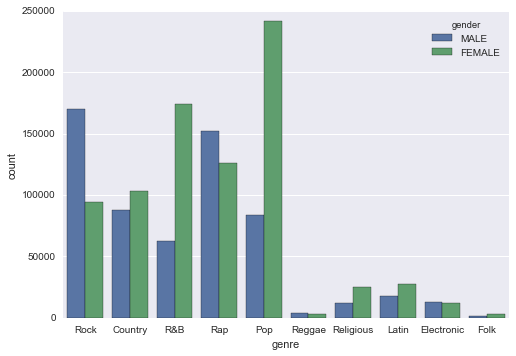

In [25]:
# show the number of male users and female users for every genre
sns.countplot(x="genre", hue = 'gender', data=df_new)

#### For example, there are about 170000 male users and 90000 female users for Rock

In [26]:
# to see age distribution for every genre, first range the ages into
# certain age group(0-15, 15- 30 and so on)
bins = [0,18,35,50,65,80,100]
group_names = ['0-18','18-35','35-50','50-65','65-80','80-100']

categories = pd.cut(df_new['age'].dropna(), bins, labels = group_names)
df_new['categories'] = pd.cut(df_new['age'], bins, labels = group_names)

df_new.head()

,genre,age,gender,categories
0,Rock,46.0,MALE,35-50
1,Rock,46.0,MALE,35-50
2,Country,46.0,MALE,35-50
3,Country,46.0,MALE,35-50
4,Country,46.0,MALE,35-50


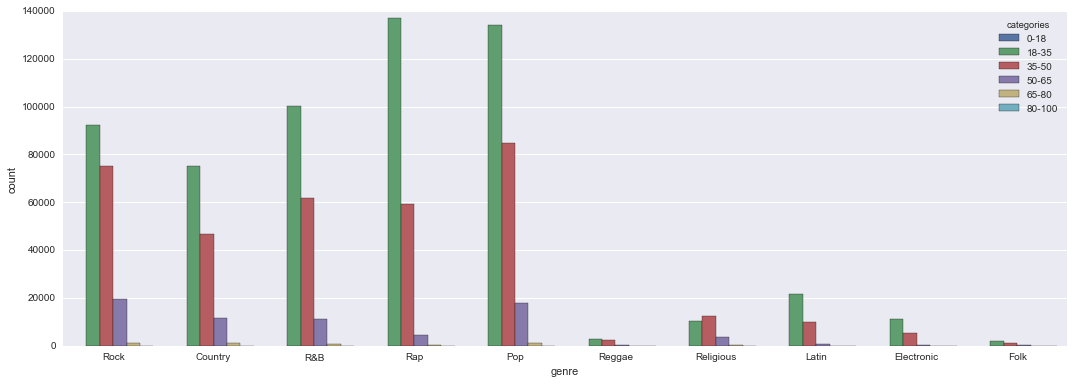

In [27]:
# now show the age group distribution 
dims = (18, 6.)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(ax = ax, x ='genre', hue = 'categories', data =df_new)

#### For Rock, there are about 90000 users are aged 18-35 ,20000 users are aged 50-65 and 75000 users are aged 35-50

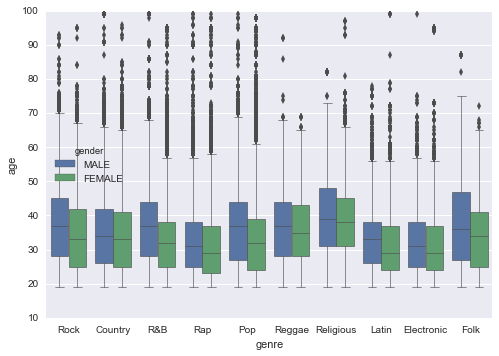

In [28]:
# show the age and gender distribution for each type of genre
sns.boxplot(x = 'genre', y = 'age',hue = 'gender',width = .8, linewidth = .6, data = df_new)

#### For each boxplot, the middle line in the box is the median value of the dataset. We mark this value as Q2 
#### The bottom line and the top line of the box indicate the median value below Q2 and above Q2. The two values are marked as Q1 and Q3. We say the length of the box is called 'interquartile range' or IQR, which equals to Q3 - Q1.
#### The values for Q1 – 1.5×IQR and Q3 + 1.5×IQR are the "fences" that mark off the "reasonable" values from the outlier values. Outliers lie outside the fences.
#### The bottom whisker and top whisker is the minimum and maximum value within the ‘fences’  

#### Now let's look at the Rock in the picture.  The minimum age of male users is about 19. The maximum age of the male users is about 94. The median age of the male users is about 37. And the median value above 37 is about 44 and median value below 37 is 28.  


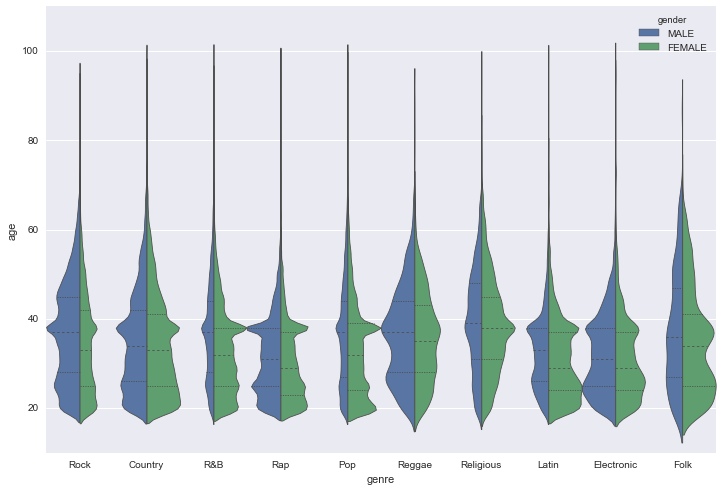

In [29]:
# show the age and gender density for every type of genre
a4_dims = (12, 8.)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(ax=ax, x="genre", y="age",hue = 'gender', data=df_new,width = 1.0, \
               split = True,linewidth = 0.8,scale ='count', inner = 'quartile')

#### This approach uses the kernel density estimate to provide a better description of the distribution of values. And the three lines within the violin are the quariles(Q1, Q2, Q3 ) in the boxplot. The violin width is scaled by the number of observations.  So we can see that the most frequency age of male user is roughly 37 and 38  for the Rock.

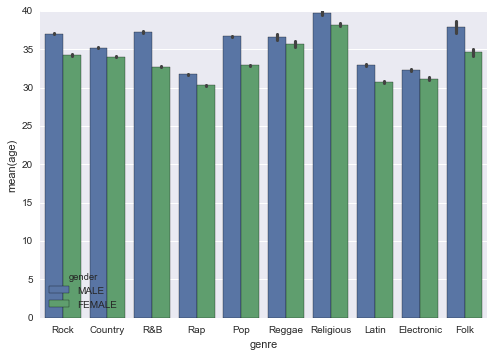

In [30]:
# this approach shows the mean value of male users and female users for every type of genre.
# the first two bars indicate the mean age of male users and female users are 37 and 34

sns.barplot(x="genre", y="age", hue="gender", data = df_new)

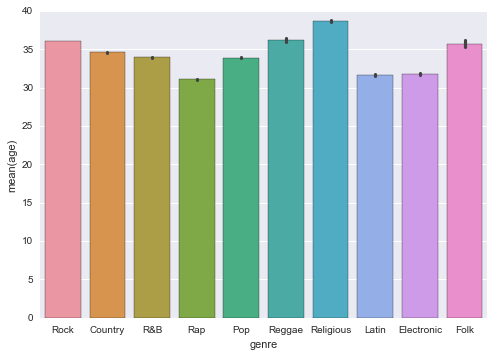

In [31]:
# show the mean value for every genre .
# The first bar indicates the mean age is 36 for Rock.
sns.barplot(x="genre", y="age", data=df_new);